In [1]:
### DMRG (excited states)
### symmetry
include("Potts-Operators & Hamiltonian.jl")
Q = 5
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
using JLD2
function run_sim(D,alg,lambda,Q ,L)
    ψ = FiniteMPS(L,Vp,Vect[ZNIrrep{Q}](0=>D,1=>D,2=>D,3=>D,4=>D))
    ψ2 = FiniteMPS(L,Vp,Vect[ZNIrrep{Q}](0=>D,1=>D,2=>D,3=>D,4=>D))
    H = Potts_Hamiltonian(L;lambda = lambda)
    println("here")
    if alg != "ED"
    (ψ, envir , delta)   = find_groundstate(ψ, H, DMRG(maxiter = 500,tol=1e-9, alg_eigsolve =MPSKit.Defaults.alg_eigsolve(; ishermitian=false)))
    save_object("GS DMRG tol 1e-10 D$D,L = $L $lambda.jld2", ψ)
    end
    #(ψ, envir , delta)   = find_groundstate(ψ, H, VUMPS(maxiter = 500,tol=1e-6))
    if alg == "QuasiparticleAnsatz"
            En0, st0 = excitations(H, QuasiparticleAnsatz(ishermitian=false), ψ, envir; sector=ZNIrrep{5}(0),num=1)
            expe = expectation_value(ψ,H)
            st = vcat(expe,En0)
            save_object("QuasiparticleAnsatz D$D,L = $L,$lambda.jld2", st)
    elseif alg == "ChepigaAnsatz"
            Ground_energy = expectation_value(ψ,H)
            En, st = excitations(H, ChepigaAnsatz(), ψ, envir;num=1)
            En0 = En[1]-Ground_energy
            st = vcat(Ground_energy ,En0)
            save_object("chepiga D$D,L = $L,$lambda.jld2", st)
        elseif alg == "DMRG" 
            Ground_energy = expectation_value(ψ,H)
            En ,st2  = excitations(H,FiniteExcited(gsalg = DMRG(tol=1e-6,eigalg =MPSKit.Defaults.alg_eigsolve(maxiter = 500,ishermitian=false))), (ψ,),init = ψ2,num=3)
            En0 = En[1]-Ground_energy
            st = vcat(Ground_energy ,En0)
            save_object("DMRG D$D,L = $L $lambda.jld2", st)
        elseif alg == "ED"
            println("here")
            save_object("ED,L = $L $lambda.jld2", exact_diagonalization(H,sector=ZNIrrep{5}(0),num= 2,alg =MPSKit.Arnoldi())[1])
        else
            println("$alg not supported")
    end
end

run_sim (generic function with 1 method)

In [ ]:
Q = 5
for l in 4:10
    Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
    run_sim(5,"ED",0.07885+0.06025im,5,l)
end

here
here


In [2]:
Q = 5
l = 24
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
d = 80 
run_sim(d,"GSONLY",0.0788+0.0603im,Q,l)

here


┌ Info: DMRG init:	obj = -8.841142827697e+01 -3.243031709165e-01im	err = 4.5951e-02
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:39
┌ Info: DMRG   1:	obj = -1.011106970746e+02 +6.616519931383e+00im	err = 2.5042848908e-03	time = 32.37 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   2:	obj = -1.011106445525e+02 +6.616724470101e+00im	err = 6.7790232696e-05	time = 22.67 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   3:	obj = -1.011106416551e+02 +6.616730668273e+00im	err = 1.7401884833e-05	time = 27.36 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   4:	obj = -1.011106411044e+02 +6.616733175301e+00im	err = 9.8292305172e-06	time = 25.10 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   5:	obj = -1.

GSONLY not supported


In [3]:
Q = 5
l = 28
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
d = 40 
run_sim(d,"GSONLY",0.0788+0.0603im,Q,l)

here


┌ Info: DMRG init:	obj = -1.064974120051e+02 -4.451682533835e-02im	err = 3.9566e-02
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:39
┌ Info: DMRG   1:	obj = -1.179382646156e+02 +7.711864283757e+00im	err = 2.5399776197e-03	time = 3.44 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   2:	obj = -1.179410179015e+02 +7.713592519417e+00im	err = 3.2636889749e-04	time = 3.48 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   3:	obj = -1.179409852381e+02 +7.713699187797e+00im	err = 8.3177976013e-05	time = 3.51 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   4:	obj = -1.179409672610e+02 +7.713730542321e+00im	err = 5.8249717899e-05	time = 3.70 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   5:	obj = -1.1794

UndefVarError: UndefVarError: `pritnln` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [4]:
Q = 5
l = 24
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
d = 80
run_sim(d,"GSONLY",0.0788+0.0603im,Q,l)

here


┌ Info: DMRG init:	obj = -9.194999900298e+01 +1.384650147191e-01im	err = 4.5557e-02
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:39
┌ Info: DMRG   1:	obj = -1.011106991887e+02 +6.616507329321e+00im	err = 2.7313344934e-03	time = 11.94 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   2:	obj = -1.011106444281e+02 +6.616722379152e+00im	err = 6.8367432745e-05	time = 8.28 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   3:	obj = -1.011106408857e+02 +6.616729239019e+00im	err = 1.6781161950e-05	time = 10.43 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   4:	obj = -1.011106398799e+02 +6.616732733185e+00im	err = 9.5674175368e-06	time = 13.19 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   5:	obj = -1.0

UndefVarError: UndefVarError: `pritnln` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [5]:
Q = 5
l = 28
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
d = 120 
run_sim(d,"GSONLY",0.0788+0.0603im,Q,l)

here


┌ Info: DMRG init:	obj = -1.056245922848e+02 -2.951281635375e-01im	err = 4.6923e-02
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:39
┌ Info: DMRG   1:	obj = -1.179403530899e+02 +7.713469656182e+00im	err = 1.7316973366e-03	time = 39.99 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   2:	obj = -1.179403376231e+02 +7.713678673317e+00im	err = 3.5251233708e-05	time = 28.75 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   3:	obj = -1.179403406346e+02 +7.713680808256e+00im	err = 8.7391910069e-06	time = 34.47 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   4:	obj = -1.179403420247e+02 +7.713679547109e+00im	err = 4.5449315534e-06	time = 37.03 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   5:	obj = -1.

UndefVarError: UndefVarError: `pritnln` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
Q = 5
l = 24
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
for d in 10:5:100 
    run_sim(d,"DMRG",0.079+0.060im,Q,l)
end

here


┌ Info: DMRG init:	obj = -9.139720339683e+01 -8.142757932887e-02im	err = 4.9662e-02
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:35
┌ Info: DMRG   1:	obj = -1.010377722630e+02 +6.525498640078e+00im	err = 1.1434415318e-02	time = 3.53 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   2:	obj = -1.010797868417e+02 +6.550651177041e+00im	err = 1.2341924548e-03	time = 3.48 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   3:	obj = -1.010881932917e+02 +6.556335852757e+00im	err = 5.8693665795e-04	time = 4.13 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   4:	obj = -1.010895961981e+02 +6.558018141336e+00im	err = 2.6578754607e-04	time = 4.30 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   5:	obj = -1.0108

here


┌ Info: DMRG init:	obj = -9.375953231625e+01 +4.282167945554e-01im	err = 4.0817e-02
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:35
┌ Info: DMRG   1:	obj = -1.010650703727e+02 +6.553235808865e+00im	err = 8.7204621627e-03	time = 9.07 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   2:	obj = -1.010946549363e+02 +6.573854425725e+00im	err = 1.3331306691e-03	time = 9.36 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   3:	obj = -1.010957992675e+02 +6.574611813976e+00im	err = 4.5600878109e-04	time = 9.84 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   4:	obj = -1.010956105416e+02 +6.574753129777e+00im	err = 2.7649354068e-04	time = 10.21 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   5:	obj = -1.010

In [10]:
using JLD2,Plots,LaTeXStrings

D = 10:5:100
L = 10
Ee = []
Eb = []
Ec = []
Ea = []
lambda = 0.0788 + 0.0603im
# for d in D
#     E = load_object("Epsilon/DMRG_PBC_D"*"$d"*"_L=24_0.079 + 0.06im.jld2")
#     push!(Ec,E[2])
    
# end
# for d in D
#     E = load_object("Epsilon/QPA_PBC_D"*"$d"*"_L=24_0.079 + 0.06im.jld2")
#     push!(Eb,E[2])
    
for d in D
    E = load_object("Section3.1/DMRG D$d,L = $L $lambda.jld2")
    push!(Ec,E[2])
    
end
for d in D
    E = load_object("Section3.1/QuasiparticleAnsatz D$d,L = $L,$lambda.jld2")
    push!(Eb,E[2])
end
    
# end
Ed = []
lambda = 0.0788 + 0.0603im
for d in D
    E = load_object("schepiga D$d,L = 10,0.0788 + 0.0603im.jld2")
    push!(Ed,E[2])
    
end
# for d in D
#     E = load_object("QuasiparticleAnsatz D$d,L = $L,$lambda.jld2")
#     push!(Ea,E[2]-E[1])
    
# end
# Eg = []
# Ef = []
# lambda = 0.0788 + 5im
# for d in D
#     E = load_object("DMRG D$d,L = $L $lambda.jld2")
#     push!(Ef,E[2]-E[1])
    
# end
# D = 10:5:15
# for d in D
#     E = load_object("QuasiparticleAnsatz D$d,L = $L,$lambda.jld2")
#     push!(Eg,E[2]-E[1])
    
# end
# D = 10:5:40
# lambda = 0.079 + 0.060im
e = load_object("ED,L = 10 0.0788 + 0.0603im.jld2")
println(e)
p = plot(5*D,imag(Ec),xguidefontsize=20,yguidefontsize=20,xlabel=L"\chi",ylabel=L"\\text{Im}(E_{ε}-E_0)",legendfontsize=10,size = (700,550),marker=:cross,label = "DMRG",title = "Extended Potts L = 10", markersize = 10)
plot!(5*D,imag(Eb),xguidefontsize=20,yguidefontsize=20,xlabel=L"\chi",marker=:cross,label = "QuasiparticleAnsatz",titlefontsize= 10,legend = :left, markersize = 10)
# p.o[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plot!(5*D,imag(Ed),xguidefontsize=20,yguidefontsize=20,xlabel=L"\chi",marker=:cross,label = "Chepiga",titlefontsize= 10, markersize = 10)
plot!(5*D,fill( imag(e[2] - e[1]),length(D)),label = "ED",linestyle=:dash,color="black")
# p = plot(5*D,real(Ec),xlabel="",size = (400,400),marker=:cross,label = "")
# plot!(5*D,real(Eb),xlabel="",ylabel="",marker=:cross,label = "")
#plot!(5*D,real(Ed),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "DMRG λ = 0.0788 + 0.603i")
#plot!(5*D,real(Ea),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "QuasiparticleAnsatz λ = 0.0788 + 0.603i")
# plot!(p,5*D,real(Ef),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "DMRG λ = 0.0788 + 5i")
# D = 10:5:15yy
println()
#plot!(p,5*D,real(Eg),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "QuasiparticleAnsatz λ = 0.0788 + 5i")
display(p)
savefig(p,"Fig6")

┌ Warning: Opening file with JLD2.MmapIO failed, falling back to IOStream
└ @ JLD2 C:\Users\vicva\.julia\packages\JLD2\nPYlZ\src\JLD2.jl:153


SystemError: SystemError: opening file "Section3.1/DMRG D10,L = 10 0.0788 + 0.0603im.jld2": No such file or directory

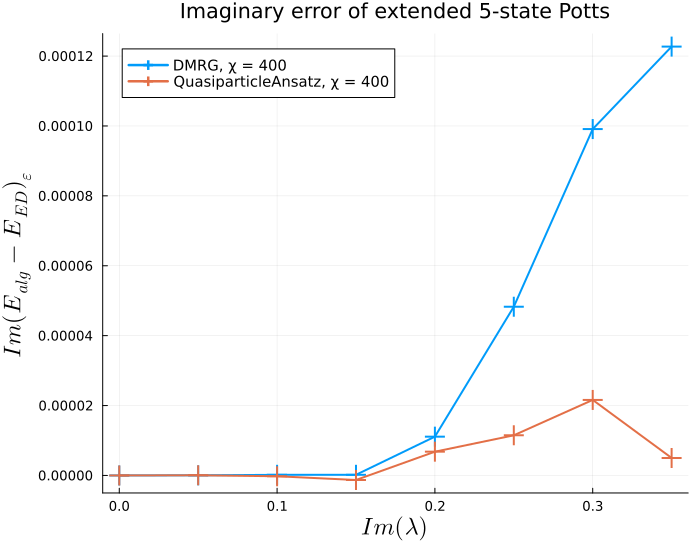

"c:\\Users\\vicva\\OneDrive\\Documenten\\git\\Thesis_CCFT\\Section3.1\\Fig6_im.png"

In [ ]:
using LaTeXStrings
using Plots
using JLD2
E1 = []
E2 =[]
D = 80
for term in 0:0.05:0.35
    E = load_object("ED,L = 10 0.0788 + $term"*"im.jld2")
    push!(E1,E[2]-E[1])
    E = load_object("QuasiparticleAnsatz D80,L = 10,0.0788 + $term"*"im.jld2")
    push!(E2,E[2])
    
end
E3 = []
for term in 0:0.05:0.30
    E = load_object("DMRG D80,L = 10 0.0788 + $term"*"im.jld2")
    push!(E3,E[2])
end
push!(E3, -3.819243455044e+01 +1.746898139985e+01im + 3.925419992866e+01 -1.969594488525e+01im)
p = plot(0:0.05:0.35,imag(E3-E1),xguidefontsize=16,yguidefontsize=16,xlabel=L"Im(λ)",ylabel=L"Im(E_{alg} - E_{ED)_{ε}",legendfontsize=10,size = (700,550),marker = :cross,label = "DMRG,    = 400",title = "Imaginary error of extended 5-state Potts", markersize = 10,legend = :topleft,linewidth = 2)

plot!(0:0.05:0.35,imag(E2-E1),xguidefontsize=16,yguidefontsize=16,xlabel=L"Im(λ)",ylabel=L"Im(E_{alg} - E_{ED})_{ε}",legendfontsize=10,size = (700,550),marker = :cross,label = "QuasiparticleAnsatz, χ = 400",markersize = 10,linewidth = 2,tickfont = 9)

#plot!(5*D,imag(Eb),xguidefontsize=20,yguidefontsize=20,xlabel=L"\chi",marker=:cross,label = "QuasiparticleAnsatz",titlefontsize= 18,legend = :left, markersize = 10)
#plot!(0:0.05:0.35,real(E1),label = "ED",linestyle=:dash,color="black")
# p = plot(5*D,real(Ec),xlabel="",size = (400,400),marker=:cross,label = "")
# plot!(5*D,real(Eb),xlabel="",ylabel="",marker=:cross,label = "")
#plot!(5*D,real(Ed),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "DMRG λ = 0.0788 + 0.603i")
#plot!(5*D,real(Ea),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "QuasiparticleAnsatz λ = 0.0788 + 0.603i")
# plot!(p,5*D,real(Ef),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "DMRG λ = 0.0788 + 5i")
# D = 10:5:15yy
println()
#plot!(p,5*D,real(Eg),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "QuasiparticleAnsatz λ = 0.0788 + 5i")
display(p)
savefig(p,"Fig6_im")

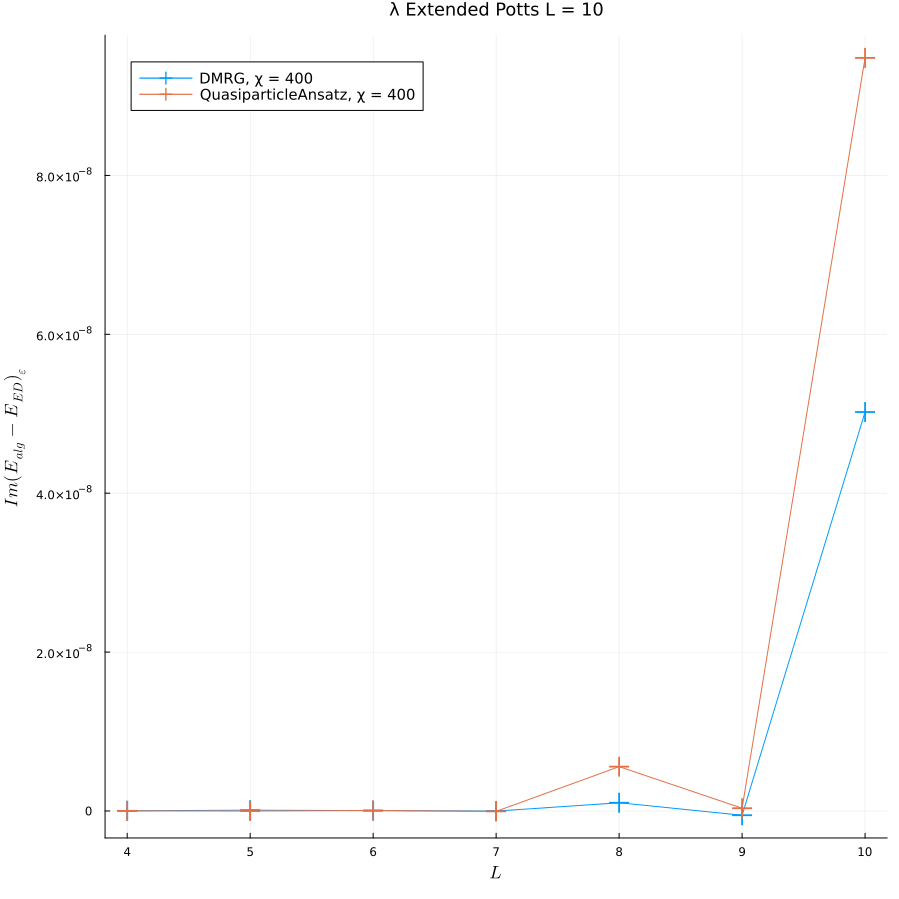

"c:\\Users\\vicva\\OneDrive\\Documenten\\git\\Thesis_CCFT\\Section3.1\\Fig6_re.png"

In [10]:
using LaTeXStrings
using Plots
using JLD2
E1 = []
E2 =[]
D = 80
E3 = []
for l in 4:10
    E = load_object("ED,L = $l 0.07885 + 0.06025im.jld2")
    push!(E1,E[2]-E[1])
    E = load_object("QuasiparticleAnsatz D80,L = $l,0.07885 + 0.06025im.jld2")
    push!(E2,E[2])
    E = load_object("DMRG D80,L = $l 0.07885 + 0.06025im.jld2")
    push!(E3,E[2])
    
end
p = plot( 4:10,imag(E3-E1),xguidefontsize=12,yguidefontsize=12,titlefontsize = 12,xlabel=L"L",ylabel=L"Im(E_{alg} - E_{ED)_{ε}",size = (900,900),legendfontsize=10,marker=:cross,label = "DMRG, χ = 400",title = "λ Extended Potts L = 10", markersize = 10)

plot!( 4:10,imag(E2-E1),xguidefontsize=12,yguidefontsize=12,titlefontsize = 12,xlabel=L"L",ylabel=L"Im(E_{alg} - E_{ED})_{ε}",legendfontsize=10,marker=:cross,label = "QuasiparticleAnsatz, χ = 400",title = "λ Extended Potts L = 10", markersize = 10)

#plot!(5*D,imag(Eb),xguidefontsize=20,yguidefontsize=20,xlabel=L"\chi",marker=:cross,label = "QuasiparticleAnsatz",titlefontsize= 18,legend = :left, markersize = 10)
#plot!(0:0.05:0.35,real(E1),label = "ED",linestyle=:dash,color="black")
# p = plot(5*D,real(Ec),xlabel="",size = (400,400),marker=:cross,label = "")
# plot!(5*D,real(Eb),xlabel="",ylabel="",marker=:cross,label = "")
#plot!(5*D,real(Ed),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "DMRG λ = 0.0788 + 0.603i")
#plot!(5*D,real(Ea),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "QuasiparticleAnsatz λ = 0.0788 + 0.603i")
# plot!(p,5*D,real(Ef),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "DMRG λ = 0.0788 + 5i")
# D = 10:5:15yy
println()
#plot!(p,5*D,real(Eg),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "QuasiparticleAnsatz λ = 0.0788 + 5i")
display(p)
savefig(p,"Fig6_re")

In [2]:
L = 10
lambda = 0.0788 - 0.0603im
H = Potts_Hamiltonian(L;lambda = lambda,sym = false)
ψ_right = FiniteMPS(L,ℂ^(Q), ℂ^100)  
(ψ_right, envs, delta) = find_groundstate(ψ_right, H, DMRG(maxiter = 1000,tol=1e-7, alg_eigsolve =MPSKit.Defaults.alg_eigsolve(; ishermitian=false)))
println(expectation_value(ψ_right,H)/L)

┌ Info: DMRG init:	obj = -3.952435232497e+01 -4.207366098287e-02im	err = 4.6199e-02
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:39
┌ Info: DMRG   1:	obj = -4.227261901111e+01 -2.794965340150e+00im	err = 1.6373651143e-02	time = 7.07 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   2:	obj = -4.227108275131e+01 -2.794803987034e+00im	err = 7.9939743075e-04	time = 4.76 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   3:	obj = -4.227107980132e+01 -2.794808657038e+00im	err = 1.0082077075e-04	time = 3.64 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   4:	obj = -4.227107769609e+01 -2.794812985475e+00im	err = 6.6074981606e-05	time = 3.83 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\WGA6b\src\algorithms\groundstate\dmrg.jl:61
┌ Info: DMRG   5:	obj = -4.2271

-4.22710618817728 - 0.2794831574795844im


In [6]:
using JLD2
save_object("DMRG L = 10lambda = 0.0788 - 0.0603imnonsymm",ψ_right)

In [18]:
for l in 1:10
    println(entropy(ψ_right,l))
end

1.1139058913277253
1.3848722315961588
1.511761137436082
1.5753349294052776
1.5949973161500528
1.5753349280107043
1.5117611371225155
1.384872231800527
1.1139058905347914
-1.776356839400252e-15


vrij gelijkaardig aan symmetrische